In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("housepricedata.csv")
df.head(3)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1


In [5]:
df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


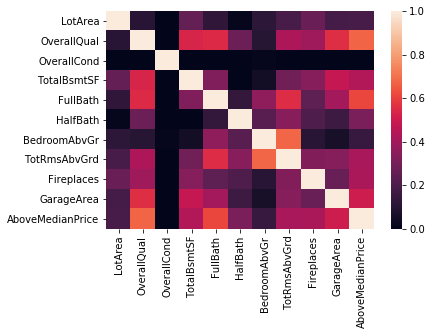

In [7]:
dataframe=pd.DataFrame(df)

corr=dataframe.corr()

ax=sns.heatmap(corr,vmin=0,vmax=1)

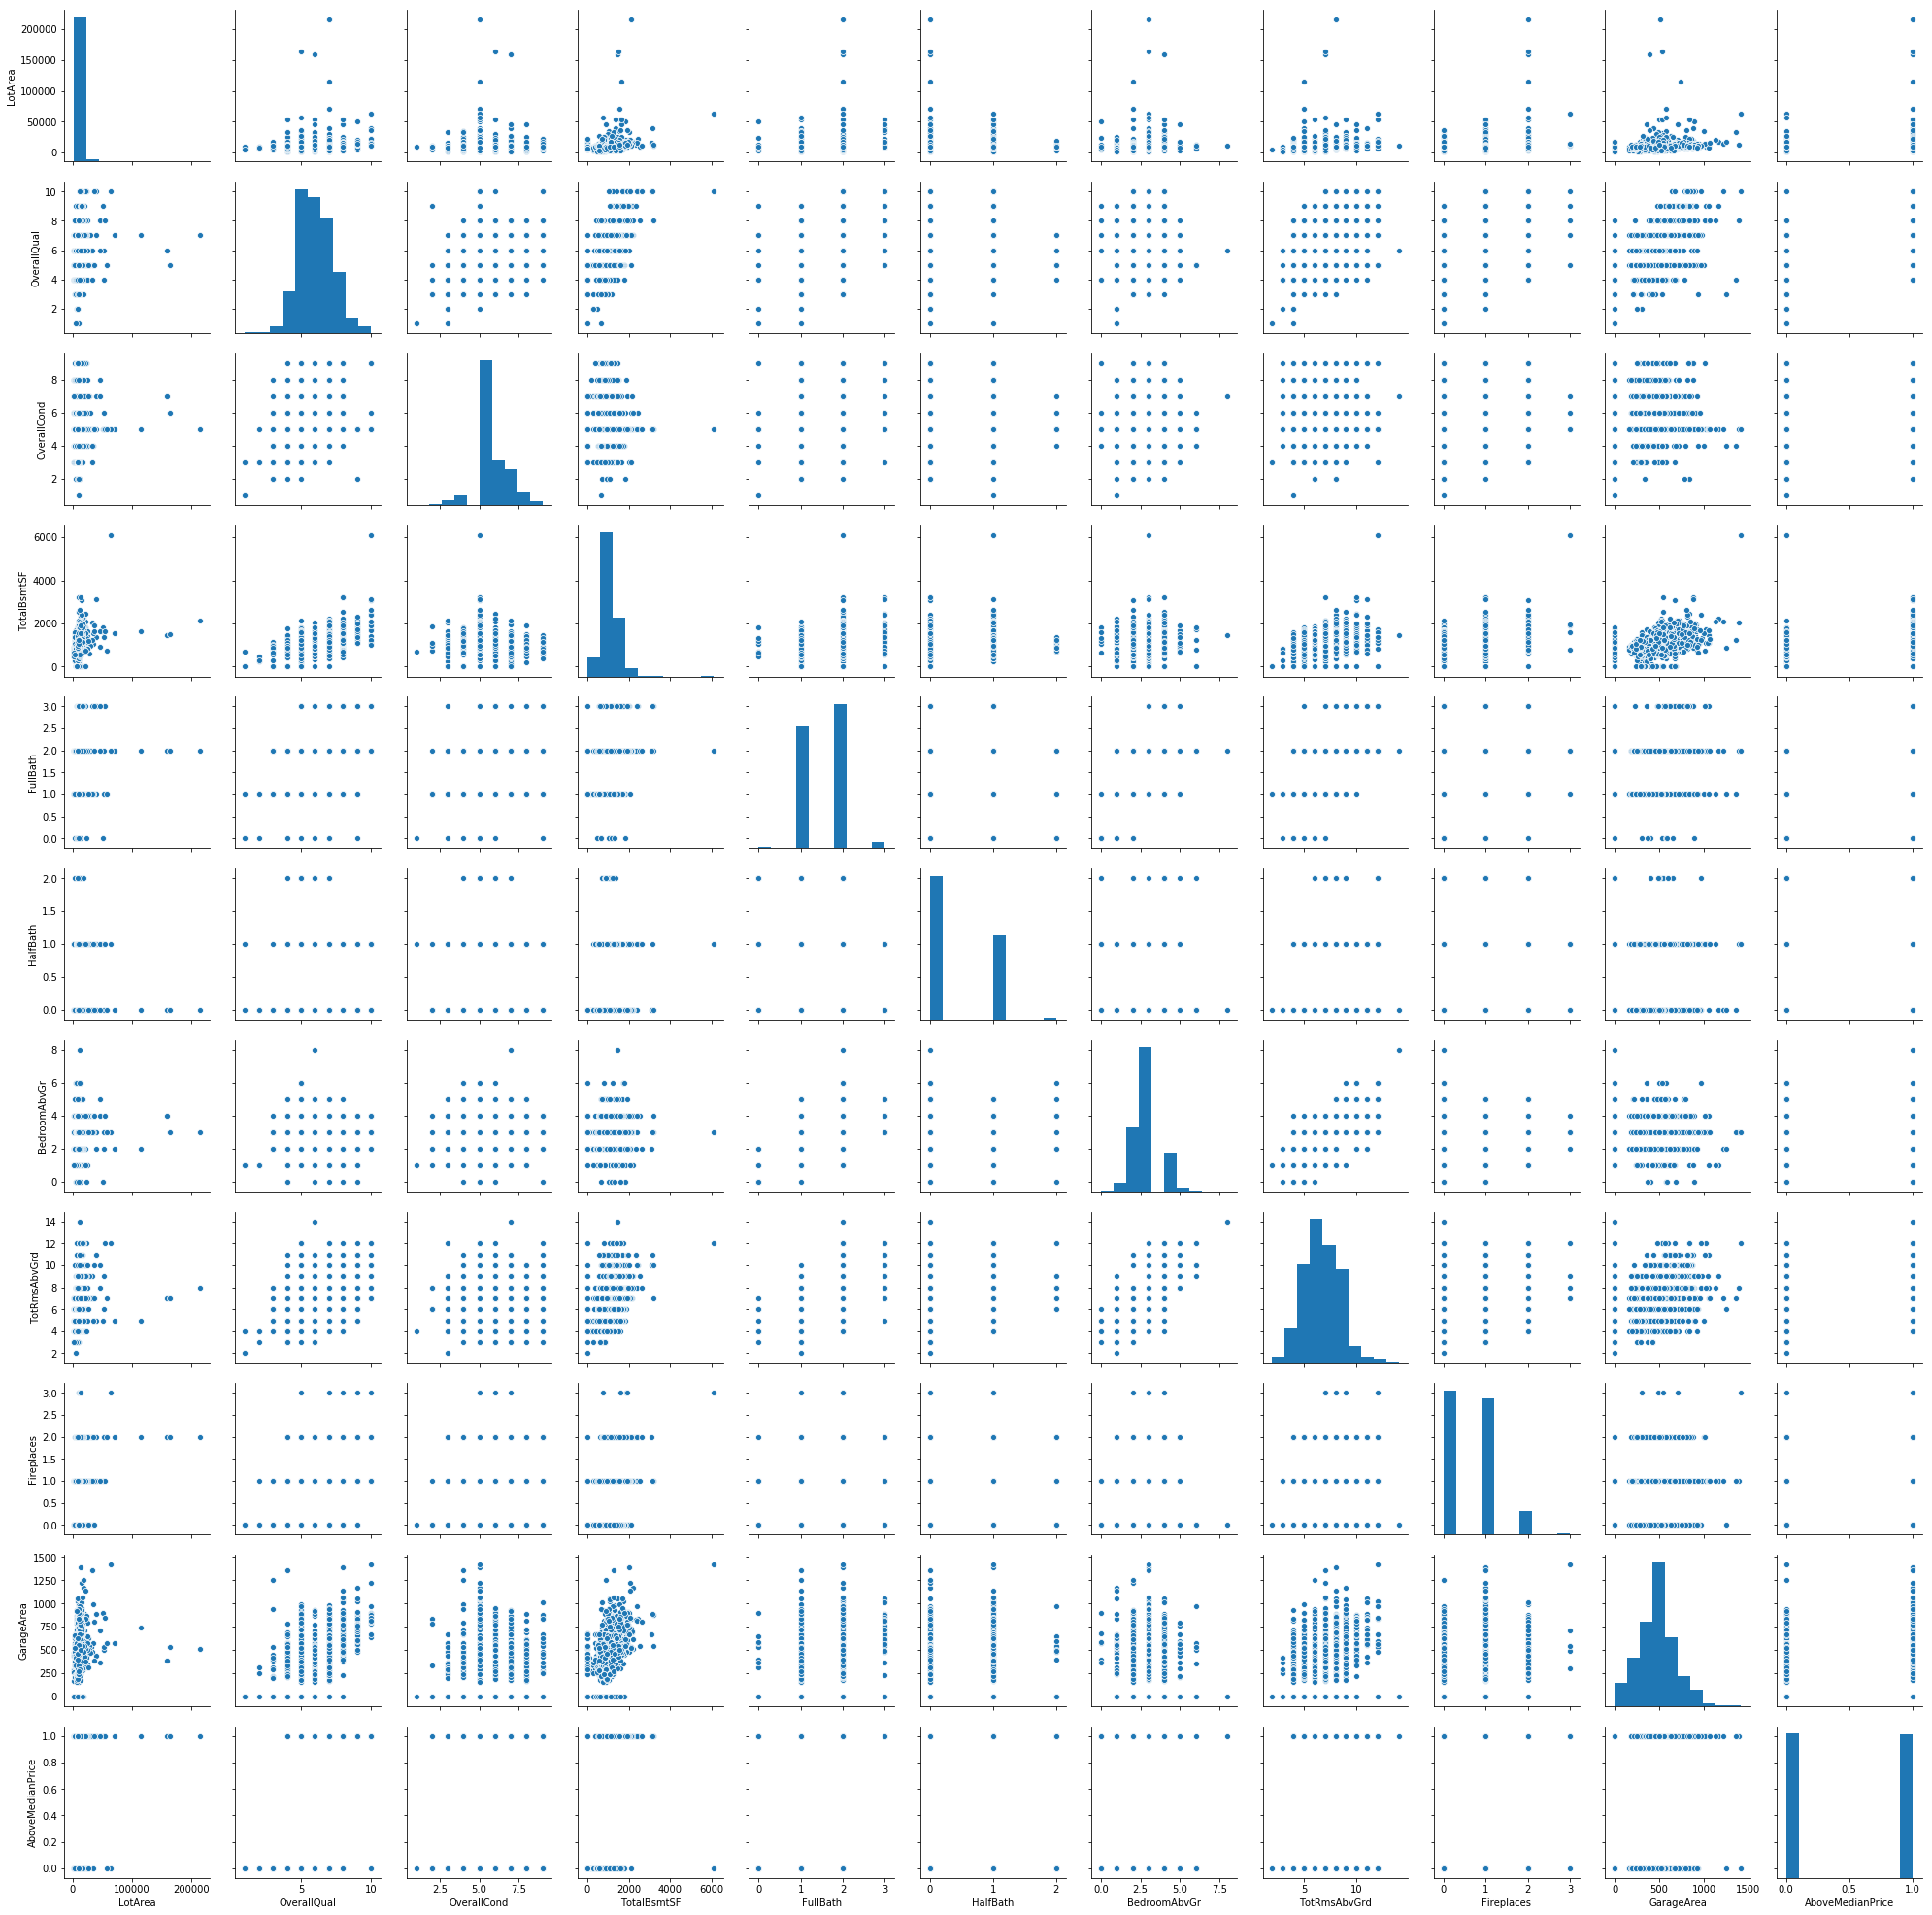

In [8]:
sns.pairplot(df)

In [9]:
x=df.iloc[:,:10]
x.head(2)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548
1,9600,6,8,1262,2,0,3,6,1,460


In [10]:
y=df.iloc[:,-1]
y.head(2)

0    1
1    1
Name: AboveMedianPrice, dtype: int64

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scale=MinMaxScaler()
x_scale=scale.fit_transform(x)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_x,test_x,train_y,test_y=train_test_split(x_scale,y,test_size=0.30)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation

Using TensorFlow backend.


In [17]:
model = Sequential()
model.add(Dense(32, input_dim=10,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
hist=model.fit(train_x,train_y, epochs=8, batch_size=16)

Instructions for updating:
Use tf.cast instead.
Epoch 1/8
1022/1022 [==============================] - 3s 3ms/step - loss: 0.7147 - acc: 0.5098
Epoch 2/8
1022/1022 [==============================] - 0s 205us/step - loss: 0.6964 - acc: 0.5147
Epoch 3/8
1022/1022 [==============================] - 0s 181us/step - loss: 0.6897 - acc: 0.6115
Epoch 4/8
1022/1022 [==============================] - 0s 216us/step - loss: 0.6835 - acc: 0.6869
Epoch 5/8
1022/1022 [==============================] - 0s 230us/step - loss: 0.6770 - acc: 0.7446 0s - loss: 0.6775 - acc: 0.74
Epoch 6/8
1022/1022 [==============================] - 0s 242us/step - loss: 0.6700 - acc: 0.7573
Epoch 7/8
1022/1022 [==============================] - 0s 264us/step - loss: 0.6628 - acc: 0.7759 0s - loss: 0.6685 - acc: 0.
Epoch 8/8
1022/1022 [==============================] - 0s 217us/step - loss: 0.6543 - acc: 0.7867


In [20]:
score = model.evaluate(test_x, test_y)

print("accuracy=",score[1])

438/438 [==============================] - 0s 895us/step
accuracy= 0.7579908673077413


## Visualizing the Loss of the model 

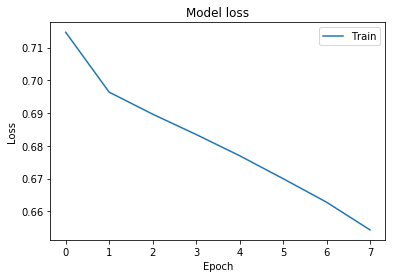

In [21]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## Visualizing Accuracy of the Model

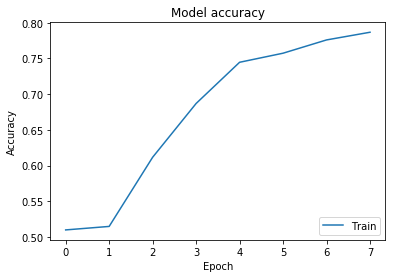

In [22]:
plt.plot(hist.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()